# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [40]:
# Request BTC data from API
btc_api = requests.get(btc_url).json()
print(json.dumps(btc_api, indent=4))

# Request ETH data from API
eth_api = requests.get(eth_url).json()
print(json.dumps(eth_api, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18643087,
            "total_supply": 18643087,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 47949.0,
                    "volume_24h": 53274970563,
                    "market_cap": 894717132385,
                    "percentage_change_1h": 0.574933075200611,
                    "percentage_change_24h": -2.69597610331177,
                    "percentage_change_7d": -11.8760560300813,
                    "percent_change_1h": 0.574933075200611,
                    "percent_change_24h": -2.69597610331177,
                    "percent_change_7d": -11.8760560300813
                },
                "CAD": {
                    "price": 60593.1513,
                    "volume_24h": 67323580300.4631,
                   

In [6]:
# Fetch current BTC price
btc_price = float(btc_api['data']['1']['quotes']['USD']['price'])

# Fetch current ETH price
eth_price = float(eth_api['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57590.40
The current value of your 5.3 ETH is $7885.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_stock

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2021-03-02 00:00:00-05:00  115.04  115.12  114.95  115.12  9860875  389.82   

                                                          
                             high  low   close    volume  
2021-03-02 00:00:00-05:00  390.07  386  386.55  70479806

In [10]:
# Pick AGG and SPY close prices
spy_close_price = float(df_stock['SPY']['close'])
agg_close_price = float(df_stock['AGG']['close'])

# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price:0.2f}")
print(f"Current AGG closing price: ${agg_close_price:0.2f}")

Current SPY closing price: $386.55
Current AGG closing price: $115.12


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19327.50
The current value of your 200 AGG shares is $23024.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000.00

# Calculate crypto and share totals
crypto_value = my_btc_value + my_eth_value
share_value = my_agg_value + my_spy_value

# Create savings DataFrame
savings_data = {
    "amount": [crypto_value, share_value]
}

# Set type of savings
savings_type = ["crypto", "shares"]

# Create the shares DataFrame
df_savings = pd.DataFrame(savings_data, index=savings_type)

# Display savings DataFrame
display(df_savings)

,amount
crypto,65475.687
shares,42351.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feeaf24af50>],
      dtype=object)

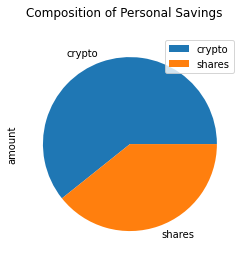

In [13]:
# Plot savings pie chart
df_savings.plot(kind='pie', title="Composition of Personal Savings", subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + share_value

# Validate saving health
if total_savings >= emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
else:
    print(f"You are ${emergency_fund - total_savings:.02f} away from reaching your goal. You can do it! ")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-02', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-02', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data_test = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data:  The dataset created had a limit of 100 lines, so instead creating multiple data frames to capture 5 years and concatonate them.
df_stock_data_test

AGG                                         \
                             open      high       low    close    volume   
2020-10-07 00:00:00-04:00  117.53  117.6600  117.4515  117.530   3867168   
2020-10-08 00:00:00-04:00  117.67  117.7100  117.5900  117.690   3580248   
2020-10-09 00:00:00-04:00  117.65  117.7400  117.5000  117.705   2750029   
2020-10-12 00:00:00-04:00  117.85  117.9400  117.7700  117.930   2770157   
2020-10-13 00:00:00-04:00  118.01  118.0700  117.9294  118.010   3250338   
...                           ...       ...       ...      ...       ...   
2021-02-24 00:00:00-05:00  115.06  115.5000  115.0100  115.470   6131453   
2021-02-25 00:00:00-05:00  115.01  115.2900  114.2000  114.410  14520445   
2021-02-26 00:00:00-05:00  114.96  115.3900  114.5915  115.370   9735524   
2021-03-01 00:00:00-05:00  114.97  115.5899  114.8900  115.130  12546198   
2021-03-02 00:00:00-05:00  115.04  115.1200  114.9500  115.120   9860875   

                              SPY                                         
                             open      high       low   close     volume  
2020-10-07 00:00:00-04:00  338.12  341.6300  338.0900  340.73   40579189  
2020-10-08 00:00:00-04:00  342.85  343.8500  341.8600  343.73   35858727  
2020-10-09 00:00:00-04:00  345.56  347.3500  344.8900  346.84   45969566  
2020-10-12 00:00:00-04:00  349.59  354.0200  349.0600  352.43   61163344  
2020-10-13 00:00:00-04:00  352.28  352.4651  349.0900  350.15   62272512  
...                           ...       ...       ...     ...        ...  
2021-02-24 00:00:00-05:00  386.33  392.2300  385.2700  391.76   64527459  
2021-02-25 00:00:00-05:00  390.41  391.8800  380.7789  382.39  137059806  
2021-02-26 00:00:00-05:00  384.35  385.5800  378.2300  380.32  134902084  
2021-03-01 00:00:00-05:00  385.59  390.9200  380.5720  389.52   92437154  
2021-03-02 00:00:00-05:00  389.82  390.0700  386.0000  386.55   70479806  

[100 rows x 10 columns]

In [17]:
# 15 segments of timeframes are needed due to a row limit

start_date1 = pd.Timestamp('2016-03-03', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2016-07-02', tz='America/New_York').isoformat()
start_date2 = pd.Timestamp('2016-07-03', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2016-11-02', tz='America/New_York').isoformat()
start_date3 = pd.Timestamp('2016-11-03', tz='America/New_York').isoformat()
end_date3 = pd.Timestamp('2017-03-02', tz='America/New_York').isoformat()
start_date4 = pd.Timestamp('2017-03-03', tz='America/New_York').isoformat()
end_date4 = pd.Timestamp('2017-07-02', tz='America/New_York').isoformat()
start_date5 = pd.Timestamp('2017-07-03', tz='America/New_York').isoformat()
end_date5 = pd.Timestamp('2017-11-02', tz='America/New_York').isoformat()
start_date6 = pd.Timestamp('2017-11-03', tz='America/New_York').isoformat()
end_date6 = pd.Timestamp('2018-03-02', tz='America/New_York').isoformat()
start_date7 = pd.Timestamp('2018-03-03', tz='America/New_York').isoformat()
end_date7 = pd.Timestamp('2018-07-02', tz='America/New_York').isoformat()
start_date8 = pd.Timestamp('2018-07-03', tz='America/New_York').isoformat()
end_date8 = pd.Timestamp('2018-11-02', tz='America/New_York').isoformat()
start_date9 = pd.Timestamp('2018-11-03', tz='America/New_York').isoformat()
end_date9 = pd.Timestamp('2019-03-02', tz='America/New_York').isoformat()
start_date10 = pd.Timestamp('2019-03-03', tz='America/New_York').isoformat()
end_date10 = pd.Timestamp('2019-07-02', tz='America/New_York').isoformat()
start_date11 = pd.Timestamp('2019-07-03', tz='America/New_York').isoformat()
end_date11 = pd.Timestamp('2019-11-02', tz='America/New_York').isoformat()
start_date12 = pd.Timestamp('2019-11-03', tz='America/New_York').isoformat()
end_date12 = pd.Timestamp('2020-03-02', tz='America/New_York').isoformat()
start_date13 = pd.Timestamp('2020-03-03', tz='America/New_York').isoformat()
end_date13 = pd.Timestamp('2020-07-02', tz='America/New_York').isoformat()
start_date14 = pd.Timestamp('2020-07-03', tz='America/New_York').isoformat()
end_date14 = pd.Timestamp('2020-11-02', tz='America/New_York').isoformat()
start_date15 = pd.Timestamp('2020-11-03', tz='America/New_York').isoformat()
end_date15 = pd.Timestamp('2021-03-02', tz='America/New_York').isoformat()

In [18]:
# Establish 15 dataframes to correspond with each date segment
df_stock_data1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1
).df

df_stock_data2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2
).df

df_stock_data3 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date3,
    end = end_date3
).df
df_stock_data4 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date4,
    end = end_date4
).df

df_stock_data5 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date5,
    end = end_date5
).df

df_stock_data6 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date6,
    end = end_date6
).df
df_stock_data7 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date7,
    end = end_date7
).df

df_stock_data8 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date8,
    end = end_date8
).df

df_stock_data9 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date9,
    end = end_date9
).df
df_stock_data10 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date10,
    end = end_date10
).df

df_stock_data11 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date11,
    end = end_date11
).df

df_stock_data12 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date12,
    end = end_date12
).df

df_stock_data13 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date13,
    end = end_date13
).df

df_stock_data14 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date14,
    end = end_date14
).df

df_stock_data15 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date15,
    end = end_date15
).df


In [19]:
# Concatenate all Dataframes into a single dataframe so that 5 years of data is in one dataframe
df_stock_data = pd.concat([df_stock_data1, df_stock_data2, df_stock_data3, df_stock_data4, df_stock_data5, df_stock_data6, df_stock_data7, df_stock_data8, df_stock_data9, df_stock_data10, df_stock_data11, df_stock_data12, df_stock_data13, df_stock_data14, df_stock_data15])
df_stock_data

AGG                                         \
                             open      high       low    close    volume   
2016-03-03 00:00:00-05:00  109.47  109.6100  109.3700  109.550   3295456   
2016-03-04 00:00:00-05:00  109.50  109.5800  109.2800  109.365   4021448   
2016-03-07 00:00:00-05:00  109.39  109.3900  109.2100  109.340   2672273   
2016-03-08 00:00:00-05:00  109.73  109.8300  109.5601  109.660   1823228   
2016-03-09 00:00:00-05:00  109.56  109.6600  109.4500  109.540   1333829   
...                           ...       ...       ...      ...       ...   
2021-02-24 00:00:00-05:00  115.06  115.5000  115.0100  115.470   6131453   
2021-02-25 00:00:00-05:00  115.01  115.2900  114.2000  114.410  14520445   
2021-02-26 00:00:00-05:00  114.96  115.3900  114.5915  115.370   9735524   
2021-03-01 00:00:00-05:00  114.97  115.5899  114.8900  115.130  12546198   
2021-03-02 00:00:00-05:00  115.04  115.1200  114.9500  115.120   9860875   

                              SPY                                        
                             open     high       low   close     volume  
2016-03-03 00:00:00-05:00  198.79  199.795  198.1100  199.76   70588424  
2016-03-04 00:00:00-05:00  200.01  201.350  199.0300  200.38   93137219  
2016-03-07 00:00:00-05:00  199.34  201.070  199.2500  200.59   73294565  
2016-03-08 00:00:00-05:00  199.32  199.920  198.2100  198.36   94857374  
2016-03-09 00:00:00-05:00  199.36  199.790  198.4300  199.42   70054724  
...                           ...      ...       ...     ...        ...  
2021-02-24 00:00:00-05:00  386.33  392.230  385.2700  391.76   64527459  
2021-02-25 00:00:00-05:00  390.41  391.880  380.7789  382.39  137059806  
2021-02-26 00:00:00-05:00  384.35  385.580  378.2300  380.32  134902084  
2021-03-01 00:00:00-05:00  385.59  390.920  380.5720  389.52   92437154  
2021-03-02 00:00:00-05:00  389.82  390.070  386.0000  386.55   70479806  

[1258 rows x 10 columns]

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_4060_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_4060_dist.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
2016-03-03 00:00:00-05:00  109.47  109.61  109.3700  109.550  3295456   
2016-03-04 00:00:00-05:00  109.50  109.58  109.2800  109.365  4021448   
2016-03-07 00:00:00-05:00  109.39  109.39  109.2100  109.340  2672273   
2016-03-08 00:00:00-05:00  109.73  109.83  109.5601  109.660  1823228   
2016-03-09 00:00:00-05:00  109.56  109.66  109.4500  109.540  1333829   

                                           SPY                           \
                          daily_return    open     high     low   close   
2016-03-03 00:00:00-05:00          NaN  198.79  199.795  198.11  199.76   
2016-03-04 00:00:00-05:00    -0.001689  200.01  201.350  199.03  200.38   
2016-03-07 00:00:00-05:00    -0.000229  199.34  201.070  199.25  200.59   
2016-03-08 00:00:00-05:00     0.002927  199.32  199.920  198.21  198.36   
2016-03-09 00:00:00-05:00    -0.001094  199.36  199.790  198.43  199.42   

                                                  
                             volume daily_return  
2016-03-03 00:00:00-05:00  70588424          NaN  
2016-03-04 00:00:00-05:00  93137219     0.003104  
2016-03-07 00:00:00-05:00  73294565     0.001048  
2016-03-08 00:00:00-05:00  94857374    -0.011117  
2016-03-09 00:00:00-05:00  70054724     0.005344

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_4060_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991962,0.989919,1.000073,1.001484,1.017404,0.999162,0.992585,0.992146,1.003127,0.998399,...,0.995977,1.008267,0.992188,0.998086,1.000865,1.006268,0.988948,0.999654,0.999243,1.004461
2,0.998369,0.980853,1.005892,1.005331,1.023522,1.000289,0.990600,1.004591,1.010879,1.002133,...,1.004390,1.010352,0.988847,0.999934,0.991573,1.003163,0.994729,0.992347,0.993625,0.984552
3,0.994386,0.994585,1.000707,0.992396,1.020126,1.003867,0.988990,1.007812,1.011939,0.997524,...,0.990706,1.007281,0.989426,0.997405,0.993255,0.995164,0.989849,0.994325,0.987176,0.983424
4,1.001399,0.987909,1.005999,0.999642,1.020378,1.015646,0.981321,1.014042,1.024149,1.002789,...,0.992318,1.013633,0.980502,1.005594,0.988021,0.996513,0.995146,0.998889,0.985978,0.990076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.434579,16.371769,7.737328,31.326425,11.058305,6.812018,17.223751,13.517267,34.345410,21.925763,...,6.181574,15.334664,5.760496,7.304675,15.527054,19.810313,9.718006,15.754510,4.792763,5.774995
7557,6.312392,16.320851,7.675481,31.211294,11.056961,6.817112,17.206949,13.445689,34.141845,21.848200,...,6.148409,15.413949,5.691650,7.336564,15.482491,19.778091,9.731339,15.875614,4.856415,5.743096
7558,6.303312,16.277459,7.605598,31.399305,11.024231,6.916325,17.096499,13.276080,33.988446,21.745566,...,6.142455,15.324954,5.749844,7.357296,15.496520,19.807331,9.638951,15.714145,4.864710,5.789366
7559,6.340986,16.308617,7.704296,31.251904,10.987090,6.903193,17.054988,13.315054,33.793358,21.881475,...,6.108744,15.207184,5.798298,7.345073,15.306869,20.039381,9.635445,15.749365,4.843588,5.772749


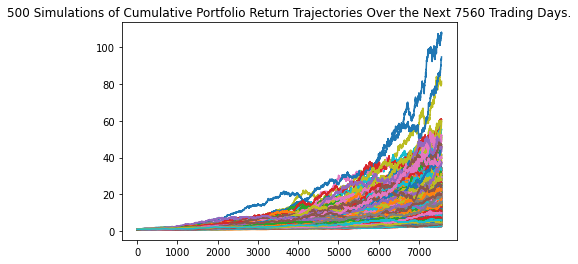

In [23]:
# Plot simulation outcomes
line_plot = MC_4060_dist.plot_simulation()

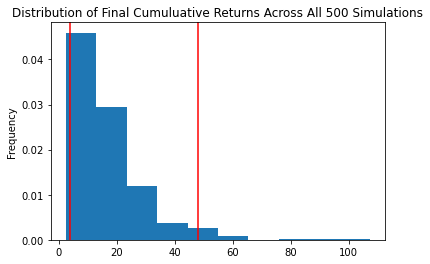

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_4060_dist.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_4060 = MC_4060_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_4060)

count           500.000000
mean             17.090672
std              12.398608
min               2.500778
25%               9.090200
50%              13.467813
75%              21.258032
max             107.439724
95% CI Lower      3.848733
95% CI Upper     47.929711
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_4060 = round(tbl_4060[8]*initial_investment,2)
ci_upper_4060 = round(tbl_4060[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_4060} and ${ci_upper_4060}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $76974.65 and $958594.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
increased_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_4060 = round(tbl_4060[8]*increased_investment,2)
ci_upper_4060 = round(tbl_4060[9]*increased_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_4060} and ${ci_upper_4060}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $115461.98 and $1437891.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001012,0.978602,1.002427,0.994148,0.999530,1.001703,0.997466,1.004263,0.988629,0.994517,...,0.999844,1.009233,0.989169,1.005829,1.000526,1.001601,0.994063,0.985936,0.998531,0.992531
2,1.007931,0.985051,1.005354,1.003536,0.996390,1.006029,0.989364,1.000314,0.983064,1.001892,...,1.005770,1.019073,0.979229,1.006739,1.013239,1.001081,0.988889,0.977955,1.000181,0.999578
3,1.013584,0.992860,1.014562,1.002851,0.992722,1.022347,0.992823,1.008359,0.975852,1.005117,...,1.016489,1.025149,0.987617,0.997874,1.017262,1.009868,0.984900,0.980801,1.011556,1.003491
4,1.021729,0.994888,1.004305,1.011387,0.995288,1.019925,0.992911,1.000428,0.964641,1.002682,...,1.012145,1.029026,0.992277,1.004235,1.005587,1.001993,0.982939,0.988326,1.003681,1.002226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.912712,1.062509,0.916811,1.634013,1.057887,2.409966,1.652372,1.377591,1.897760,0.794074,...,1.940302,1.605390,1.299139,1.155675,1.247063,1.631443,1.936951,1.292168,1.476365,1.352572
1257,1.940036,1.062898,0.916667,1.635968,1.058723,2.416996,1.677097,1.362941,1.895380,0.796225,...,1.964070,1.615337,1.295124,1.151980,1.256188,1.625783,1.920568,1.310661,1.463554,1.343388
1258,1.956053,1.081793,0.907532,1.624566,1.048770,2.428464,1.674047,1.382587,1.895907,0.794375,...,1.954824,1.612601,1.294153,1.153300,1.236124,1.639250,1.929646,1.305743,1.450255,1.345442
1259,1.926147,1.081298,0.910862,1.634658,1.050298,2.422914,1.677712,1.371174,1.896206,0.799848,...,1.955278,1.610155,1.283908,1.155946,1.229894,1.635948,1.938512,1.324675,1.460735,1.340573


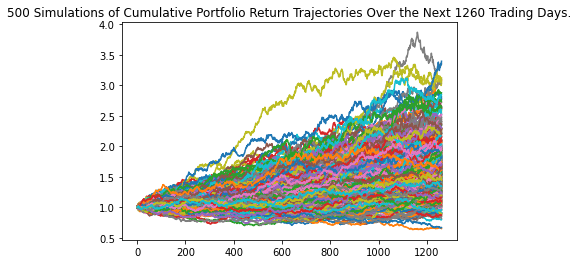

In [30]:
# Plot simulation outcomes
line_plot_5yr = MC_5yr_dist.plot_simulation()

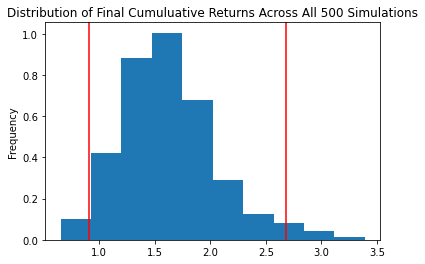

In [31]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5yr_dist.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_5yr_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.632081
std               0.437442
min               0.649934
25%               1.336785
50%               1.595879
75%               1.851696
max               3.392844
95% CI Lower      0.909535
95% CI Upper      2.685474
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment_5yr = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5yr = round(tbl_5yr[8]*initial_investment_5yr,2)
ci_upper_5yr = round(tbl_5yr[9]*initial_investment_5yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yr} and ${ci_upper_5yr}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18190.7 and $53709.49


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991815,1.013519,1.009810,1.010195,1.006952,0.997790,1.004551,1.011004,1.002921,1.013225,...,0.998198,0.980127,0.986558,1.002516,0.999221,0.998595,1.003298,0.996052,0.998596,1.007139
2,0.999529,1.017139,1.008389,1.014578,1.003995,1.004281,1.006469,1.004906,1.016874,1.023819,...,0.999792,0.973594,0.979794,0.990342,1.017976,0.994159,1.001676,0.993376,1.003225,1.010646
3,1.000280,1.025602,1.009784,1.020971,1.003999,1.003539,1.014710,1.002681,1.013781,1.027583,...,1.008833,0.974748,0.985887,0.992506,1.018891,0.994940,1.014229,0.993939,1.001890,1.004507
4,1.002986,1.024551,0.998770,1.018850,0.998167,1.006735,1.022195,1.012056,1.016742,1.035692,...,1.007251,0.974173,0.988070,1.002015,1.017159,0.997676,1.019048,0.995969,0.997251,1.009182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.678046,3.207832,2.360039,2.763281,3.399242,2.289134,3.526467,2.447007,1.813454,2.519150,...,0.939867,1.357294,1.464811,3.900149,2.636941,3.874550,2.559275,3.938281,2.381185,1.755950
2517,1.676548,3.261756,2.351976,2.744937,3.354207,2.320284,3.526344,2.435683,1.800195,2.503551,...,0.937821,1.336702,1.474122,3.922704,2.658292,3.863670,2.544805,3.952287,2.390087,1.744172
2518,1.676056,3.254686,2.340652,2.722034,3.315337,2.328143,3.509765,2.426752,1.798634,2.516354,...,0.927511,1.336723,1.474746,3.936575,2.626742,3.859232,2.540069,3.955962,2.400099,1.736308
2519,1.671915,3.274715,2.341751,2.750528,3.337098,2.313554,3.471031,2.403844,1.797240,2.536798,...,0.935357,1.332133,1.479837,3.983563,2.624226,3.814193,2.542172,4.002476,2.438226,1.725361


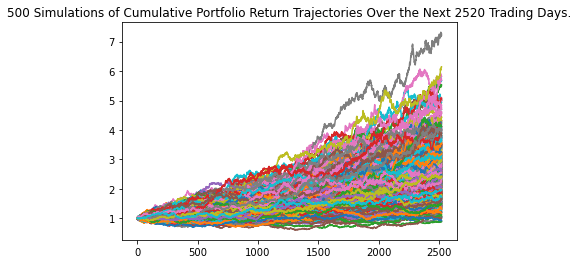

In [36]:
# Plot simulation outcomes
line_plot_10yr = MC_10yr_dist.plot_simulation()

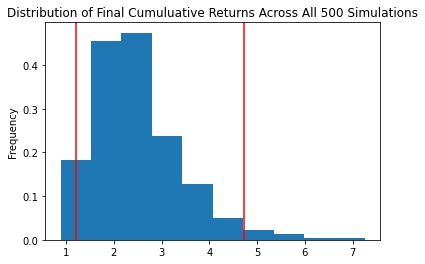

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10yr_dist.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_10yr_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              2.485947
std               0.913688
min               0.885896
25%               1.834450
50%               2.323461
75%               2.921611
max               7.257444
95% CI Lower      1.202998
95% CI Upper      4.736947
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment_10yr = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10yr = round(tbl_10yr[8]*initial_investment_10yr,2)
ci_upper_10yr = round(tbl_10yr[9]*initial_investment_10yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10yr} and ${ci_upper_10yr}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24059.95 and $94738.94
